<a href="https://colab.research.google.com/github/soulaimane2/Digits_Recognition_ANN/blob/master/Hand_Writen_Digits_(Mnist)_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import tensorflow as tf
import keras
import matplotlib.pyplot as plt
print(tf.__version__)

2.2.0


In [11]:
(x_train,y_train),(x_test,y_test) = keras.datasets.mnist.load_data()
x_train,x_test = x_train / 255., x_test / 255.
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

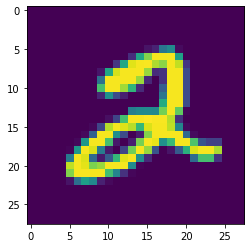

In [12]:
plt.imshow(x_train[5])
plt.show()

In [0]:
model = keras.Sequential([
                          keras.layers.Flatten(input_shape = (28,28)),
                          keras.layers.Dense(128,activation='relu'),
                          keras.layers.Dropout(0.2),
                          keras.layers.Dense(10,activation='softmax')
])

In [0]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
              )

In [16]:
r = model.fit(x_train,y_train,epochs=10)

Epoch 1/10
60000/60000 [==============================] - 5s 82us/step - loss: 0.0304 - accuracy: 0.9896
Epoch 2/10
60000/60000 [==============================] - 5s 82us/step - loss: 0.0276 - accuracy: 0.9904
Epoch 3/10
60000/60000 [==============================] - 5s 81us/step - loss: 0.0274 - accuracy: 0.9907
Epoch 4/10
60000/60000 [==============================] - 5s 81us/step - loss: 0.0277 - accuracy: 0.9907
Epoch 5/10
60000/60000 [==============================] - 5s 81us/step - loss: 0.0270 - accuracy: 0.9907
Epoch 6/10
60000/60000 [==============================] - 5s 81us/step - loss: 0.0246 - accuracy: 0.9914
Epoch 7/10
60000/60000 [==============================] - 5s 82us/step - loss: 0.0239 - accuracy: 0.9918
Epoch 8/10
60000/60000 [==============================] - 5s 82us/step - loss: 0.0240 - accuracy: 0.9916
Epoch 9/10
60000/60000 [==============================] - 5s 83us/step - loss: 0.0229 - accuracy: 0.9920
Epoch 10/10
60000/60000 [==============================

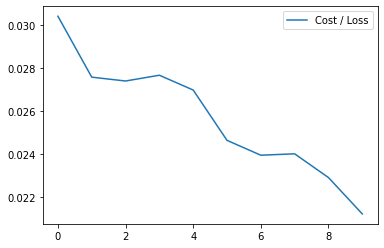

In [20]:
# visualize the loss per each epoch
plt.plot(r.history['loss'],label='Cost / Loss')
plt.legend()

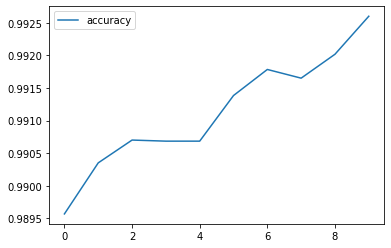

In [22]:
# visualize the accuraccy per each epoch
plt.plot(r.history['accuracy'],label="accuracy")
plt.legend()

In [23]:
# Evaluate our model
print(model.evaluate(x_test,y_test))

10000/10000 [==============================] - 0s 26us/step
[0.08695363403022562, 0.980400025844574]


## **evaluation of the model :**
**[Loss = 0.08695363403022562, Accuracy = 0.980400025844574]**

In [0]:
# Let's predict and see how our model is doing

In [0]:
p_test = model.predict(x_test).argmax(axis=1)

In [68]:
p_test[0]

7

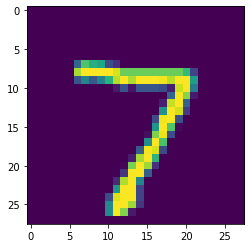

In [69]:
plt.imshow(x_test[0])

Text(0.5, 1.0, 'True : 2  |  Predicted : 7')

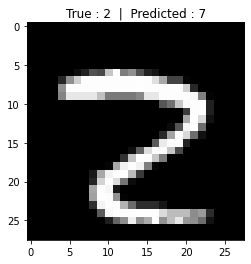

In [83]:
# As long as our model is not 100% accurate let's plot the misclassified digits

misclassified_index = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_index)
plt.imshow(x_test[i],cmap = 'gray')

plt.title("True : %s  |  Predicted : %s"%(y_test[i],p_test[i]))